<a href="https://colab.research.google.com/github/kgazaleh/thwnd_2000-IDS/blob/main/problem1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem 1 (Python)
In this problem, you will perform more data analyses on the adult_training dataset that was used previously: https://github.com/bforoura/IDS/blob/main/decision_trees.ipynb

In [1]:
# import data from github

import numpy as np
import pandas as pd

adult_trainingDF  = pd.read_csv("https://raw.githubusercontent.com/kgazaleh/thwnd_2000-IDS/main/HW4/adult_training.csv");

adult_trainingDF

,age,workclass,education,marital-status,occupation,sex,capital-gain,capital-loss,income
0,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Male,0,0,<=50K
1,38,Private,9,Divorced,Handlers-cleaners,Male,0,0,<=50K
2,49,Private,5,Married-spouse-absent,Other-service,Female,0,0,<=50K
3,52,Self-emp-not-inc,9,Married-civ-spouse,Exec-managerial,Male,0,0,>50K
4,31,Private,14,Never-married,Prof-specialty,Female,14084,0,>50K
...,...,...,...,...,...,...,...,...,...
14792,43,Self-emp-not-inc,10,Married-civ-spouse,Craft-repair,Male,0,0,<=50K
14793,32,Private,6,Married-civ-spouse,Handlers-cleaners,Male,0,0,<=50K
14794,32,Private,14,Never-married,Tech-support,Male,0,0,<=50K
14795,58,Private,9,Widowed,Adm-clerical,Female,0,0,<=50K


1. Write four functions to create classification models, record classification accuracy, and plot results. You will need to demonstrate your functions using the following calls (feel free to add extra formal function parameters, as necessary):

...

cart_classifier = makeDTModel("gini", X_train, y_train)

c5_classifier = makeDTModel("entropy", X_train, y_train)

...

display text and graphic representation of a tree classifier

displayTree(cart_classifier, X)

displayTree(c5_classifier, X)

...

display text and heatmap of a confusion matrix

displayCM(cart_classifier, X_train, y_train, X_test, y_test)

displayCM(c5_classifier, X_train, y_train, X_test, y_test)

...

create and display plots of side-by-side model comparisons

compareModels(cart_classifier, c5_classifier)

In [2]:
# Create a new dataframe for the classification task with only three columns: two predictors and a target
new_adultDF = adult_trainingDF.filter(['workclass','marital-status','income'], axis=1)

new_adultDF.head(10)

,workclass,marital-status,income
0,Self-emp-not-inc,Married-civ-spouse,<=50K
1,Private,Divorced,<=50K
2,Private,Married-spouse-absent,<=50K
3,Self-emp-not-inc,Married-civ-spouse,>50K
4,Private,Never-married,>50K
5,Private,Married-civ-spouse,>50K
6,Private,Married-civ-spouse,<=50K
7,Private,Married-civ-spouse,<=50K
8,?,Married-civ-spouse,>50K
9,Private,Divorced,<=50K


In [3]:
#Encode the categoric columns
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

# save the encoded dataframe here
encoded_adultDF = pd.DataFrame()

# Encode  only the categoric or boolean attributes (if any)
for i in range(0, new_adultDF.shape[1]):
    if new_adultDF.dtypes[i]=='object' or new_adultDF.dtypes[i]=='bool':
        encoded_adultDF[new_adultDF.columns[i]] = le.fit_transform(new_adultDF[new_adultDF.columns[i]])
    else:
        encoded_adultDF[new_adultDF.columns[i]] = new_adultDF[new_adultDF.columns[i]]
        
encoded_adultDF.head(10)

,workclass,marital-status,income
0,6,2,0
1,4,0,0
2,4,3,0
3,6,2,1
4,4,4,1
5,4,2,1
6,4,2,0
7,4,2,0
8,0,2,1
9,4,0,0


In [4]:
from sklearn.model_selection import train_test_split

# Prepare X and y
X = encoded_adultDF.filter(['workclass','marital-status'], axis=1)
y = encoded_adultDF['income']

#80-20 split
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, random_state=42, shuffle=True, train_size=0.80, stratify=y)

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

|--- marital-status <= 2.50
|   |--- marital-status <= 0.50
|   |   |--- class: 0
|   |--- marital-status >  0.50
|   |   |--- workclass <= 0.50
|   |   |   |--- class: 0
|   |   |--- workclass >  0.50
|   |   |   |--- workclass <= 1.50
|   |   |   |   |--- class: 1
|   |   |   |--- workclass >  1.50
|   |   |   |   |--- class: 0
|--- marital-status >  2.50
|   |--- class: 0



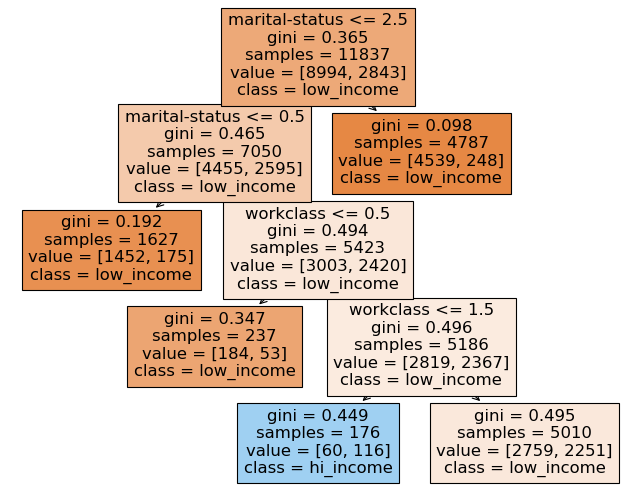

In [6]:
# The CART tree
cart_classifier = DecisionTreeClassifier(criterion = "gini", 
                                         max_leaf_nodes=5,
                                         random_state = 120).fit(X_train, y_train)
                                         
# Control the figure size
from matplotlib.pyplot import figure
figure(figsize=(10, 8), dpi=80)

# Plot the tree
cn = ['low_income', 'hi_income']
tree.plot_tree(cart_classifier, feature_names=X.columns.values.tolist(), 
                                class_names=cn,
                                filled = True)


# Print the text version of the tree
text_representation = tree.export_text(cart_classifier, 
                                       feature_names=X.columns.values.tolist())
print(text_representation)

|--- marital-status <= 2.50
|   |--- marital-status <= 0.50
|   |   |--- class: 0
|   |--- marital-status >  0.50
|   |   |--- workclass <= 0.50
|   |   |   |--- class: 0
|   |   |--- workclass >  0.50
|   |   |   |--- workclass <= 1.50
|   |   |   |   |--- class: 1
|   |   |   |--- workclass >  1.50
|   |   |   |   |--- class: 0
|--- marital-status >  2.50
|   |--- class: 0



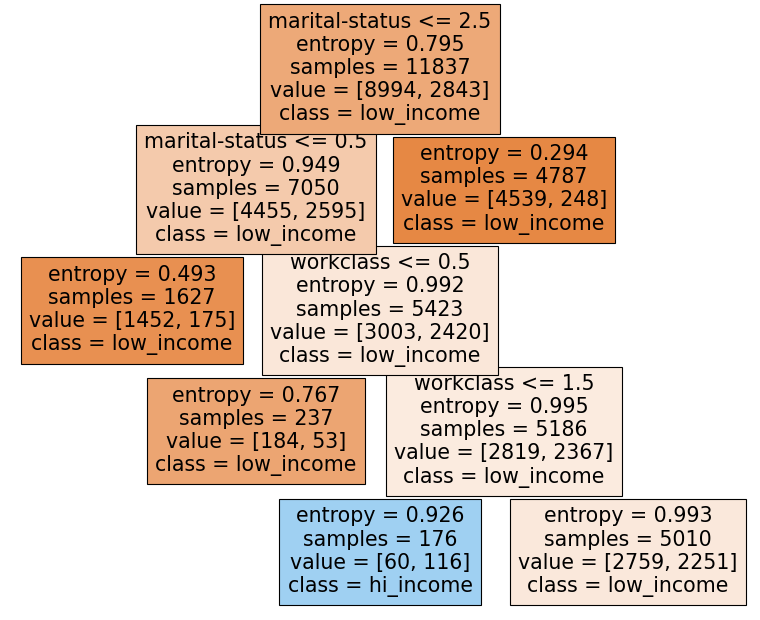

In [7]:
# The C5.0 tree
c5_classifier = DecisionTreeClassifier(criterion = "entropy", 
                                       max_leaf_nodes=5,
                                       random_state = 120).fit(X_train,y_train)

# Control the figure size
figure(figsize=(12, 10), dpi=80)

# Plot the tree
cn = ['low_income', 'hi_income']
tree.plot_tree(c5_classifier, feature_names=X.columns.values.tolist(), 
                                class_names=cn,
                                filled=True)

# Print the text version of the tree
text_representation = tree.export_text(c5_classifier, 
                                       feature_names=X.columns.values.tolist())
print(text_representation)

In [8]:
# Record CART's classification accuracy on tarining and test datasets
score1 = round(cart_classifier.score(X_train, y_train), 2) # training score
score2 = round(cart_classifier.score(X_test, y_test), 2)   # testing score

print ("CART Training and Testing scores: %.2f, %.2f" %  (score1, score2))


# Record C5's classification accuracy on tarining and test datasets
score3 = round(c5_classifier.score(X_train, y_train), 2) # training score
score4 = round(c5_classifier.score(X_test, y_test), 2)   # testing score

print ("C5.0 Training and Testing scores: %.2f, %.2f" %  (score3, score4))


CART Training and Testing scores: 0.76, 0.76
C5.0 Training and Testing scores: 0.76, 0.76


In [9]:
from sklearn.metrics import confusion_matrix

# Record CART's and C5's predictions
cart_predictions = cart_classifier.predict(X_test)
c5_predictions = c5_classifier.predict(X_test)

# Compute TP, TN, FP, FN values for CART
cart_cm = confusion_matrix(y_true=y_test, 
                           y_pred = cart_predictions)

c5_cm = confusion_matrix(y_true=y_test, 
                        y_pred = c5_predictions)

# Print CART's confusion matrix
print(cart_cm)

print("-----------")

# Print C5's confusion matrix
print(c5_cm)

[[2231   18]
 [ 682   29]]
-----------
[[2231   18]
 [ 682   29]]


Text(0.5, 89.87999999999997, 'Predicted label')

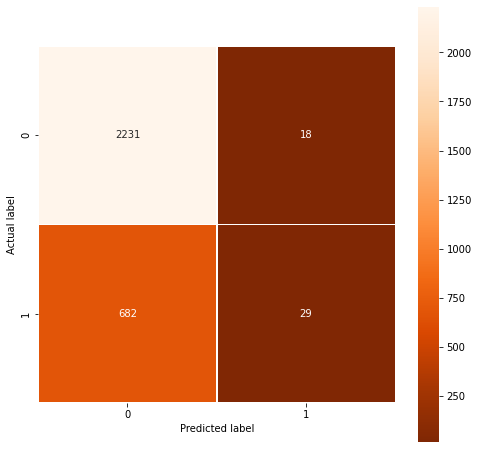

In [10]:
#CART Heatmap
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,8))
sns.heatmap(cart_cm, annot=True, 
            linewidths=.5, square = True, cmap = 'Oranges_r', fmt='0.4g');

plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Text(0.5, 89.87999999999997, 'Predicted label')

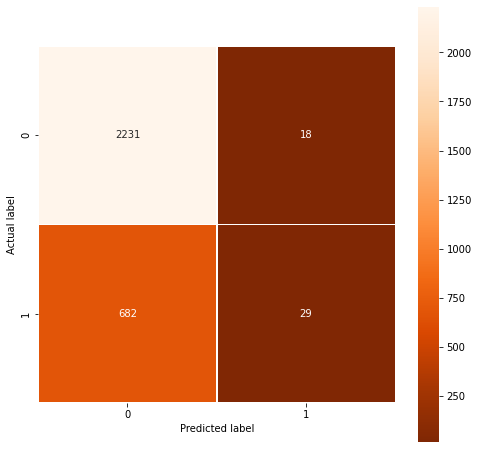

In [11]:
#C5 heatmap
plt.figure(figsize=(8,8))
sns.heatmap(c5_cm, annot=True, 
            linewidths=.5, square = True, cmap = 'Oranges_r', fmt='0.4g');

plt.ylabel('Actual label')
plt.xlabel('Predicted label')


2. Analyze the effect of the parameters max_depth and max_leaf_nodes on classification accuracy. Plot the obtained accuracy values for various choices of max_depth (e.g. 2, 3, 4, none) and max_leaf_nodes (3, 4, 5, none).

|--- marital-status <= 2.50
|   |--- marital-status <= 0.50
|   |   |--- class: 0
|   |--- marital-status >  0.50
|   |   |--- workclass <= 0.50
|   |   |   |--- class: 0
|   |   |--- workclass >  0.50
|   |   |   |--- class: 0
|--- marital-status >  2.50
|   |--- class: 0



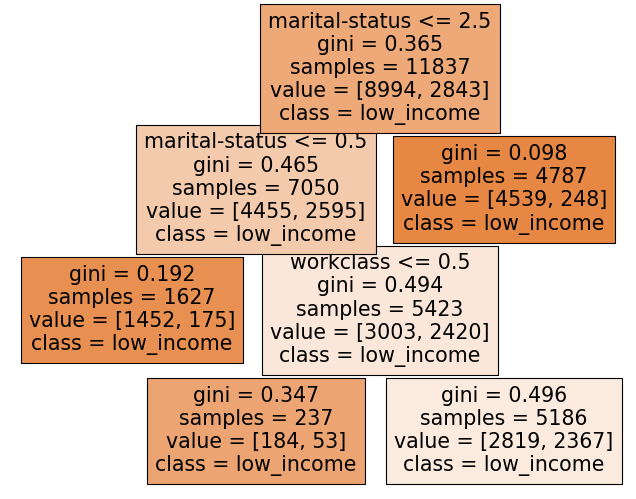

In [12]:
#max_leaf_nodes=4
cart_classifier = DecisionTreeClassifier(criterion = "gini", 
                                         max_leaf_nodes=4,
                                         random_state = 120).fit(X_train, y_train)

figure(figsize=(10, 8), dpi=80)

# Plot the tree
cn = ['low_income', 'hi_income']
tree.plot_tree(cart_classifier, feature_names=X.columns.values.tolist(), 
                                class_names=cn,
                                filled = True)

# Print the text version of the tree
text_representation = tree.export_text(cart_classifier, 
                                       feature_names=X.columns.values.tolist())
print(text_representation)

|--- marital-status <= 2.50
|   |--- marital-status <= 0.50
|   |   |--- class: 0
|   |--- marital-status >  0.50
|   |   |--- class: 0
|--- marital-status >  2.50
|   |--- class: 0



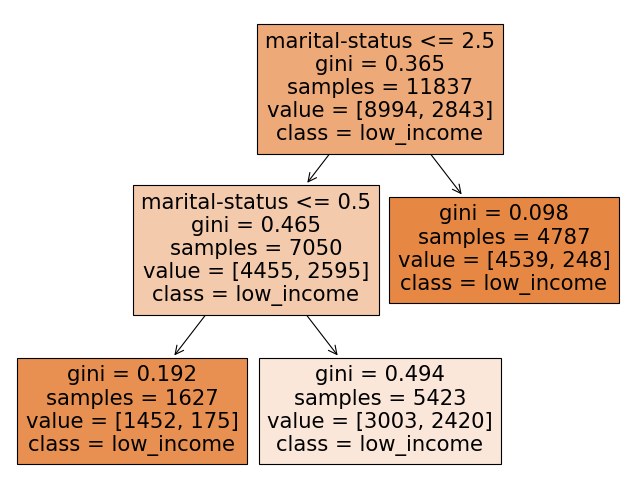

In [13]:
#max_leaf_nodes=4
cart_classifier = DecisionTreeClassifier(criterion = "gini", 
                                         max_leaf_nodes=3,
                                         random_state = 120).fit(X_train, y_train)

# Control the figure size
figure(figsize=(10, 8), dpi=80)

# Plot the tree
cn = ['low_income', 'hi_income']
tree.plot_tree(cart_classifier, feature_names=X.columns.values.tolist(), 
                                class_names=cn,
                                filled = True)

# Print the text version of the tree
text_representation = tree.export_text(cart_classifier, 
                                       feature_names=X.columns.values.tolist())
print(text_representation)

|--- marital-status <= 2.50
|   |--- marital-status <= 0.50
|   |   |--- workclass <= 4.50
|   |   |   |--- workclass <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- workclass >  0.50
|   |   |   |   |--- workclass <= 1.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- workclass >  1.50
|   |   |   |   |   |--- workclass <= 2.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- workclass >  2.50
|   |   |   |   |   |   |--- workclass <= 3.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- workclass >  3.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |--- workclass >  4.50
|   |   |   |--- workclass <= 5.50
|   |   |   |   |--- class: 0
|   |   |   |--- workclass >  5.50
|   |   |   |   |--- workclass <= 6.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- workclass >  6.50
|   |   |   |   |   |--- class: 0
|   |--- marital-status >  0.50
|   |   |--- workclass <= 0.50
|   |   |   |--- marital-status <= 1.50
|   |   |   |  

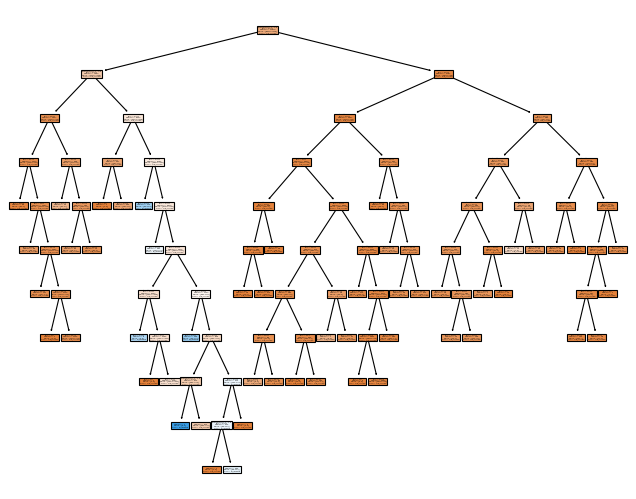

In [14]:
#max_leaf_nodes=None
cart_classifier = DecisionTreeClassifier(criterion = "gini", 
                                         max_leaf_nodes=None,
                                         random_state = 120).fit(X_train, y_train)

# Control the figure size
figure(figsize=(10, 8), dpi=80)

# Plot the tree
cn = ['low_income', 'hi_income']
tree.plot_tree(cart_classifier, feature_names=X.columns.values.tolist(), 
                                class_names=cn,
                                filled = True)

# Print the text version of the tree
text_representation = tree.export_text(cart_classifier, 
                                       feature_names=X.columns.values.tolist())
print(text_representation)

|--- marital-status <= 2.50
|   |--- marital-status <= 0.50
|   |   |--- class: 0
|   |--- marital-status >  0.50
|   |   |--- class: 0
|--- marital-status >  2.50
|   |--- workclass <= 4.50
|   |   |--- class: 0
|   |--- workclass >  4.50
|   |   |--- class: 0



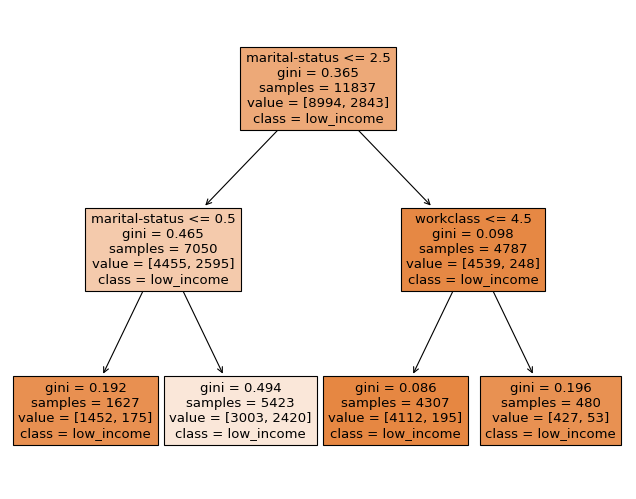

In [15]:
#max_depth=2
cart_classifier = DecisionTreeClassifier(criterion = "gini", 
                                         max_depth=2,
                                         random_state = 120).fit(X_train, y_train)

# Control the figure size
figure(figsize=(10, 8), dpi=80)

# Plot the tree
cn = ['low_income', 'hi_income']
tree.plot_tree(cart_classifier, feature_names=X.columns.values.tolist(), 
                                class_names=cn,
                                filled = True)

# Print the text version of the tree
text_representation = tree.export_text(cart_classifier, 
                                       feature_names=X.columns.values.tolist())
print(text_representation)

|--- marital-status <= 2.50
|   |--- marital-status <= 0.50
|   |   |--- workclass <= 4.50
|   |   |   |--- class: 0
|   |   |--- workclass >  4.50
|   |   |   |--- class: 0
|   |--- marital-status >  0.50
|   |   |--- workclass <= 0.50
|   |   |   |--- class: 0
|   |   |--- workclass >  0.50
|   |   |   |--- class: 0
|--- marital-status >  2.50
|   |--- workclass <= 4.50
|   |   |--- marital-status <= 5.50
|   |   |   |--- class: 0
|   |   |--- marital-status >  5.50
|   |   |   |--- class: 0
|   |--- workclass >  4.50
|   |   |--- workclass <= 6.50
|   |   |   |--- class: 0
|   |   |--- workclass >  6.50
|   |   |   |--- class: 0



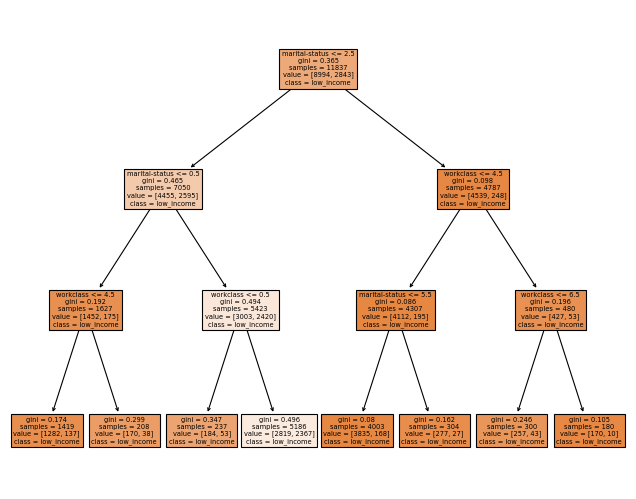

In [16]:
#max_depth=3
cart_classifier = DecisionTreeClassifier(criterion = "gini", 
                                         max_depth=3,
                                         random_state = 120).fit(X_train, y_train)

# Control the figure size
figure(figsize=(10, 8), dpi=80)

# Plot the tree
cn = ['low_income', 'hi_income']
tree.plot_tree(cart_classifier, feature_names=X.columns.values.tolist(), 
                                class_names=cn,
                                filled = True)

# Print the text version of the tree
text_representation = tree.export_text(cart_classifier, 
                                       feature_names=X.columns.values.tolist())
print(text_representation)

|--- marital-status <= 2.50
|   |--- marital-status <= 0.50
|   |   |--- workclass <= 4.50
|   |   |   |--- workclass <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- workclass >  0.50
|   |   |   |   |--- class: 0
|   |   |--- workclass >  4.50
|   |   |   |--- workclass <= 5.50
|   |   |   |   |--- class: 0
|   |   |   |--- workclass >  5.50
|   |   |   |   |--- class: 0
|   |--- marital-status >  0.50
|   |   |--- workclass <= 0.50
|   |   |   |--- marital-status <= 1.50
|   |   |   |   |--- class: 0
|   |   |   |--- marital-status >  1.50
|   |   |   |   |--- class: 0
|   |   |--- workclass >  0.50
|   |   |   |--- workclass <= 1.50
|   |   |   |   |--- class: 1
|   |   |   |--- workclass >  1.50
|   |   |   |   |--- class: 0
|--- marital-status >  2.50
|   |--- workclass <= 4.50
|   |   |--- marital-status <= 5.50
|   |   |   |--- workclass <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- workclass >  0.50
|   |   |   |   |--- class: 0
|   |   |--- marital-status >  5.

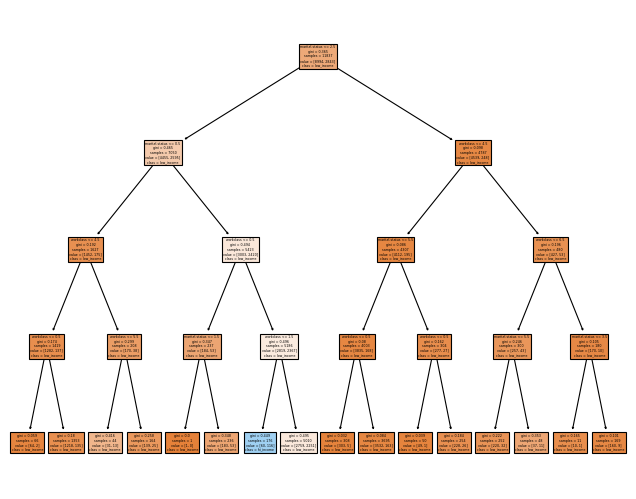

In [17]:
#max_depth=4
cart_classifier = DecisionTreeClassifier(criterion = "gini", 
                                         max_depth=4,
                                         random_state = 120).fit(X_train, y_train)

# Control the figure size
figure(figsize=(10, 8), dpi=80)

# Plot the tree
cn = ['low_income', 'hi_income']
tree.plot_tree(cart_classifier, feature_names=X.columns.values.tolist(), 
                                class_names=cn,
                                filled = True)

# Print the text version of the tree
text_representation = tree.export_text(cart_classifier, 
                                       feature_names=X.columns.values.tolist())
print(text_representation)

|--- marital-status <= 2.50
|   |--- marital-status <= 0.50
|   |   |--- workclass <= 4.50
|   |   |   |--- workclass <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- workclass >  0.50
|   |   |   |   |--- workclass <= 1.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- workclass >  1.50
|   |   |   |   |   |--- workclass <= 2.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- workclass >  2.50
|   |   |   |   |   |   |--- workclass <= 3.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- workclass >  3.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |--- workclass >  4.50
|   |   |   |--- workclass <= 5.50
|   |   |   |   |--- class: 0
|   |   |   |--- workclass >  5.50
|   |   |   |   |--- workclass <= 6.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- workclass >  6.50
|   |   |   |   |   |--- class: 0
|   |--- marital-status >  0.50
|   |   |--- workclass <= 0.50
|   |   |   |--- marital-status <= 1.50
|   |   |   |  

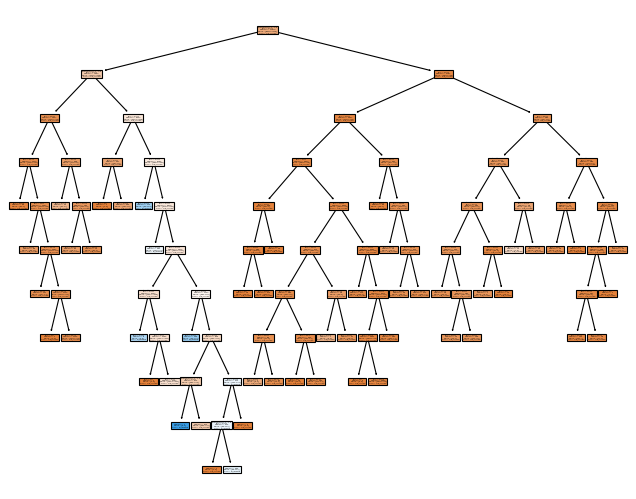

In [18]:
#max_depth=None
cart_classifier = DecisionTreeClassifier(criterion = "gini", 
                                         max_depth=None,
                                         random_state = 120).fit(X_train, y_train)

# Control the figure size
figure(figsize=(10, 8), dpi=80)

# Plot the tree
cn = ['low_income', 'hi_income']
tree.plot_tree(cart_classifier, feature_names=X.columns.values.tolist(), 
                                class_names=cn,
                                filled = True)

# Print the text version of the tree
text_representation = tree.export_text(cart_classifier, 
                                       feature_names=X.columns.values.tolist())
print(text_representation)

#Summary

CART and C5.0 have similar accuracies with this dataset as can be seen in the comparison below.

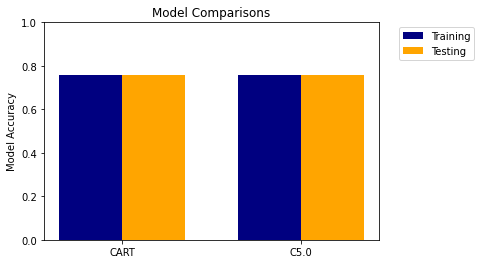

In [19]:
labels = ['CART', 'C5.0']
training_scores = [score1, score3]
testing_scores =  [score2, score4]

x = np.arange(2)  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, training_scores, width, label='Training', color='navy')
rects2 = ax.bar(x + width/2, testing_scores, width, label='Testing', color='orange')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Model Accuracy')
ax.set_xticks(x)
ax.set_ylim(0,1)
ax.set_xticklabels(labels)
ax.legend(bbox_to_anchor = (1.3, 1.0), loc='upper right')

plt.title('Model Comparisons')
plt.show()